# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



# Task 1
## Subtask A - Verify Column Content Matches Description
When reviewing the values in columns, the 'cause' and 'claim_amount' column were found to have values that did not match the description. 

'Cause' had issues such as "VEGETABLES" and " Meat" represented as responses, this was determined by running a count of all values present in the column and looking for any that did not meet the description. To ensure the values met the description these erroneous values were reformatted to "vegetable" and "meat" respectively.

'Claim_amount' was not formatted as a floating point and would need to be reformatted to meet the description. The leading characters 'R$ ' were removed and the values were converted to numeric. 

All other nominal columns met the description and there were no extreme values that would indicate and error in the numeric columns. The 'claim_id' column was found to be a proper unique identifier as well.

## Subtask B - Determine Null Values in the Columns
Using Python, each column was checked for null values and the total number of null values was recorded. Only two columns were found to have null values present 'amount_paid' and 'linked_cases', with 36 and 26 null values respectively.

## Subtask C - Rectify Null Values 
To replace the null values in 'amount_paid' and 'linked_cases' the pandas function 'fillna()' was used to manipulate the DataFrame. 'linked_cases' had all null values replace with 'False’ this column was then converted to Boolean for future analysis. The null values in 'amount_paid' were replaced with the median value of that column, found using the median() function.  

# Task 2
## Subtask A
The location with the highest amount of claims is RECIFE, as show by the histogram below.

![Claim Amounts Per Location](Claims_per_Location.png)
## Subtask B
To determine if location is balanced in each category, various visualizations were created. These included stacked bar charts for nominal variables, to ensure that all locations had a similar proportion of responses. Additionally, bar charts were used to measure the total value for numeric observations per location to ensure that this parodied the general proportion of claims per location. These test determined that there is a relative balance in observations per location.

![Causes per Location](Causes_per_loc.png)
![Linked Cases per Location](Linked_case_per_loc.png)
![Total Time to Close per Location](Total_time_per_loc.png)
![Total Claim Amount and Amount Paid per Location](Total_claim_amt_per_loc.png)
![Total Amount of Individuals per Location](Total_ind_per_loc.png)


# Task 3

The distribution of time to close for all claims in the data set is a normal distribution with a right skew.

![Distribution of Time to Close for all claims](Time_to_close_dist.png)

# Task 4

To determine the relationship between location and time to close, we first determined the distribution of time to close per location and then the average time to close per location. Both of these indicated that the location does not have a major effect on the time to close as similar distribution and average time was found for each location.

![Distribution of Time to Close per Location](Close_dist_per_loc.png)
![Average Time to Close per Location](Avg_close_per_loc.png)

## Task 1



In [14]:
import pandas as pd
import matplotlib.pyplot as plt

#Load the cvs as a DataFrame#
df = pd.read_csv('food_claims_2212.csv')
#check the data type of the columns#
print(df.dtypes)

claim_id                  int64
time_to_close             int64
claim_amount             object
amount_paid             float64
location                 object
individuals_on_claim      int64
linked_cases             object
cause                    object
dtype: object


In [16]:
#Checking for Null Values in Columns#

for column in df.columns:
    print(column)
    print(f"Number of null values: {df[column].isnull().sum()} \n")
print('----------')

#Replace Null Values

df['linked_cases'].fillna('False', inplace=True)
#Print to confirm null values were updated
print(df['linked_cases'].name)
print(f"Number of null values: {df['linked_cases'].isnull().sum()}\n")
df['linked_cases'] = df['linked_cases'].astype(bool)

medianpaid = df['amount_paid'].median() #finding the median value for 'amount_paid'
df['amount_paid'].fillna(medianpaid, inplace=True)
#Print to confirm null values were updated
print(df['amount_paid'].name)
print(f"Number of null values: {df['amount_paid'].isnull().sum()}\n")


claim_id
Number of null values: 0 

time_to_close
Number of null values: 0 

claim_amount
Number of null values: 0 

amount_paid
Number of null values: 36 

location
Number of null values: 0 

individuals_on_claim
Number of null values: 0 

linked_cases
Number of null values: 26 

cause
Number of null values: 0 

----------
linked_cases
Number of null values: 0

amount_paid
Number of null values: 0



In [15]:
#Checking that claim_id is a unique identifier
print(df['claim_id'].is_unique)

#Counting the occurances of values for nominal catagories
cause_counts = df['cause'].value_counts()
print(cause_counts)

location_counts = df['location'].value_counts()
print(location_counts)

linked_counts = df['linked_cases'].value_counts()
print(linked_counts)

#Replacing the incorrect values to meet description

df['cause'].replace({'VEGETABLES':'vegetable', ' Meat':'meat'}, inplace=True)
cause_counts = df['cause'].value_counts()
print(cause_counts)

#reformating claim_amount to remove "R$ "
df['claim_amount'] = df['claim_amount'].str.replace('R$ ', '', regex=False)
df['claim_amount'] = pd.to_numeric(df['claim_amount'])
print(df['claim_amount'][:10])
print(df['claim_amount'].dtypes)


True
meat          943
unknown       713
vegetable     314
VEGETABLES     16
 Meat          14
Name: cause, dtype: int64
RECIFE       885
SAO LUIS     517
FORTALEZA    311
NATAL        287
Name: location, dtype: int64
False    1493
True      481
Name: linked_cases, dtype: int64
meat         957
unknown      713
vegetable    330
Name: cause, dtype: int64
0    74474.55
1    52137.83
2    24447.20
3    29006.28
4    19520.60
5    47529.14
6    39073.26
7    29870.56
8    26644.46
9    11544.68
Name: claim_amount, dtype: float64
float64


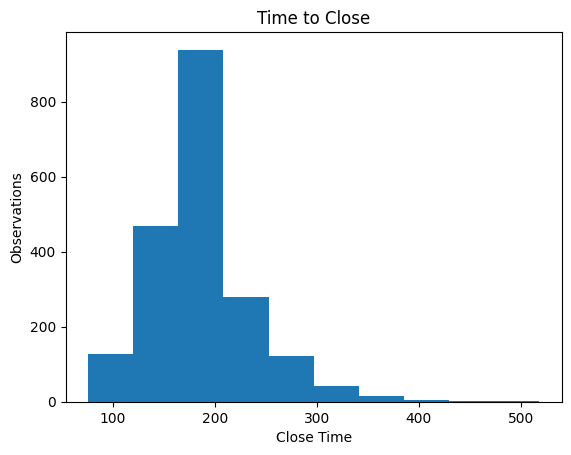

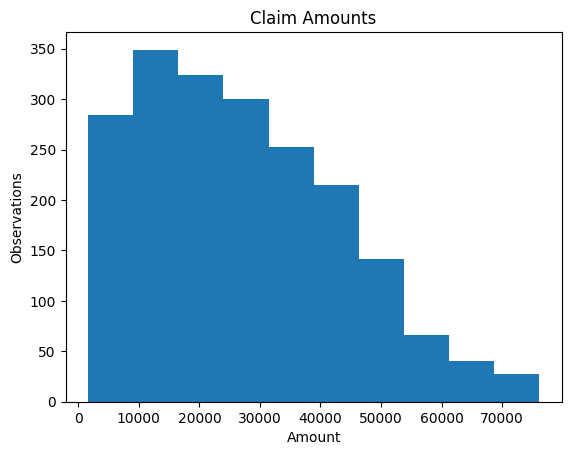

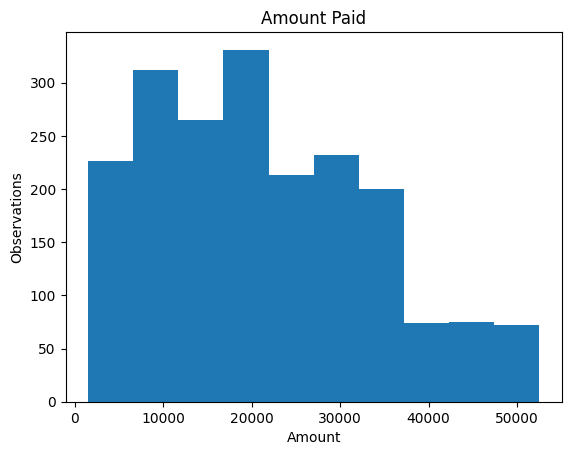

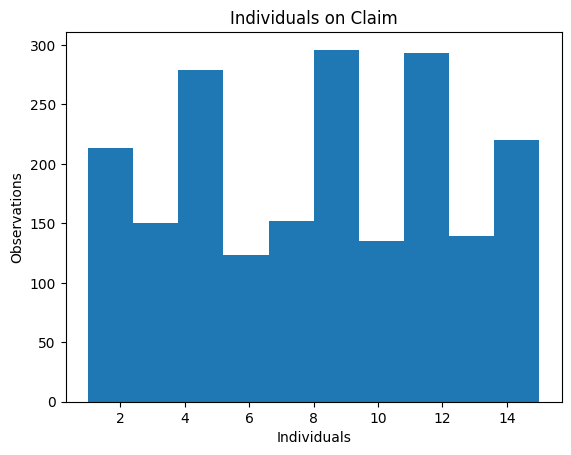

In [17]:
#Checking discrete and continuous values
plt.hist(df['time_to_close'])

plt.xlabel('Close Time')
plt.ylabel('Observations')
plt.title('Time to Close')

plt.show()

plt.hist(df['claim_amount'])

plt.xlabel('Amount')
plt.ylabel('Observations')
plt.title('Claim Amounts')

plt.show()

plt.hist(df['amount_paid'])

plt.xlabel('Amount')
plt.ylabel('Observations')
plt.title('Amount Paid')

plt.show()

plt.hist(df['individuals_on_claim'])

plt.xlabel('Individuals')
plt.ylabel('Observations')
plt.title('Individuals on Claim')

plt.show()


## Task 2

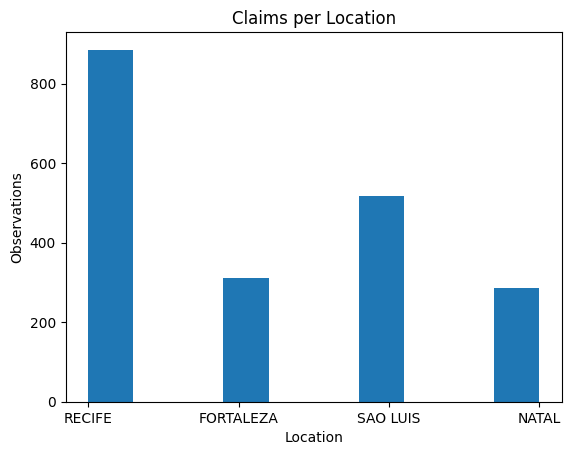

In [18]:
#Plotting location to see what has the most occurances
plt.hist(df['location'])

plt.xlabel('Location')
plt.ylabel('Observations')
plt.title('Claims per Location')

plt.show()

In [19]:
# Group the data by 'cause' and 'location', and count the number of observations
cause_df = df.groupby(['cause','location']).size().unstack(level=0)
# Convert the result to a data frame with categories as columns and variables as rows

linked_df = df.groupby(['linked_cases','location']).size().unstack(level=0)

df_payment = df[['location','amount_paid','claim_amount']]
pay_sum = df_payment.groupby('location').sum()

df_close = df[['location','time_to_close']]
close_sum = df_close.groupby('location').sum()

df_ind = df[['location','individuals_on_claim']]
ind_sum = df_ind.groupby('location').sum()

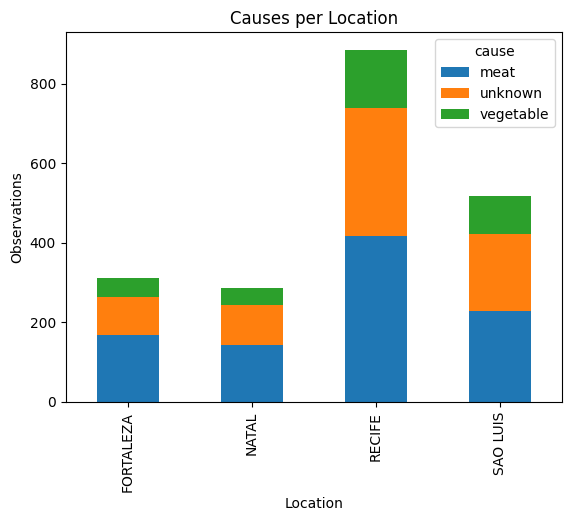

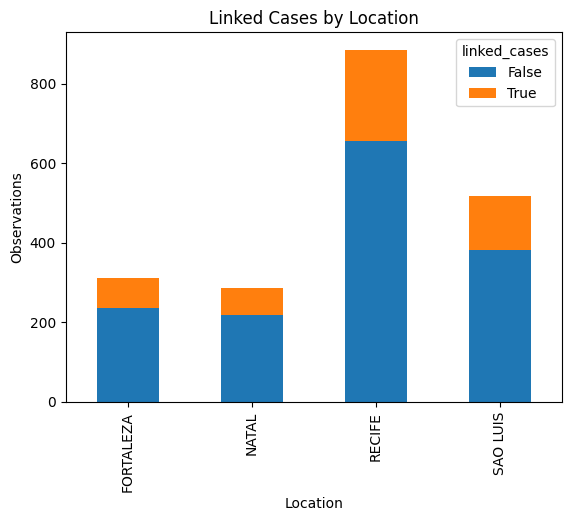

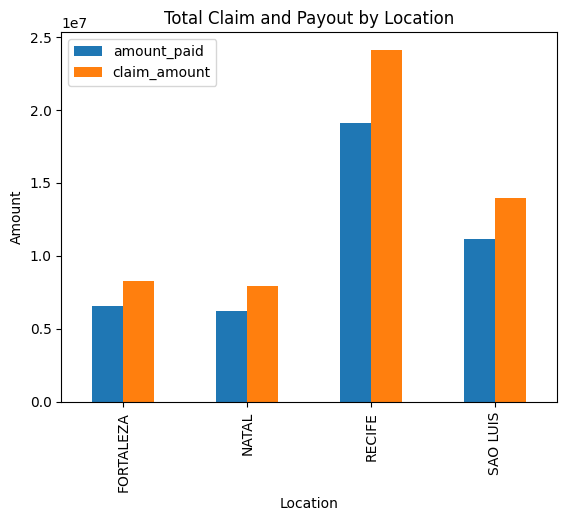

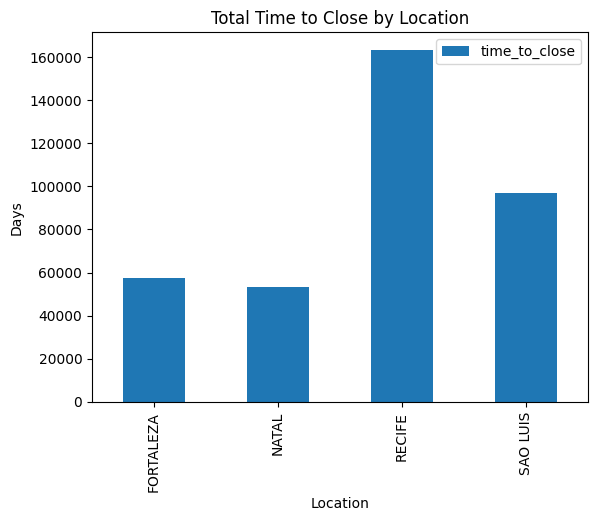

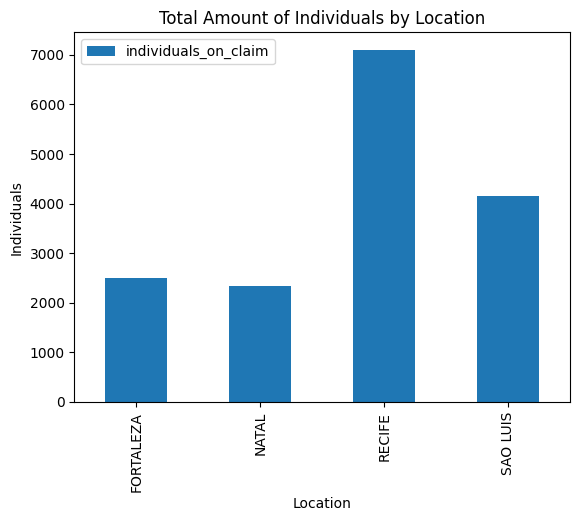

In [20]:
cause_df.plot(kind='bar', stacked=True)

plt.xlabel('Location')
plt.ylabel('Observations')
plt.title('Causes per Location')

plt.show()

linked_df.plot(kind='bar', stacked=True)

plt.xlabel('Location')
plt.ylabel('Observations')
plt.title('Linked Cases by Location')

plt.show()

pay_sum.plot(kind='bar')

plt.xlabel('Location')
plt.ylabel('Amount')
plt.title('Total Claim and Payout by Location')

plt.show()

plt.show()

close_sum.plot(kind='bar')

plt.xlabel('Location')
plt.ylabel('Days')
plt.title('Total Time to Close by Location')

plt.show()

plt.show()

ind_sum.plot(kind='bar')

plt.xlabel('Location')
plt.ylabel('Individuals')
plt.title('Total Amount of Individuals by Location')

plt.show()




## Task 3

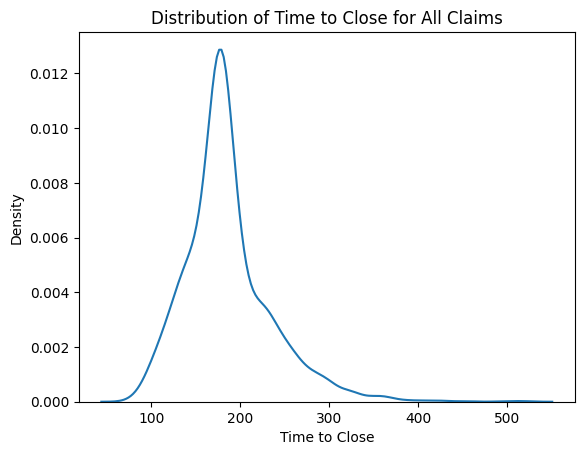

In [36]:
import seaborn as sns

sns.kdeplot(data=df, x='time_to_close')
plt.xlabel('Time to Close')
plt.title('Distribution of Time to Close for All Claims')
plt.show()

## Task 4

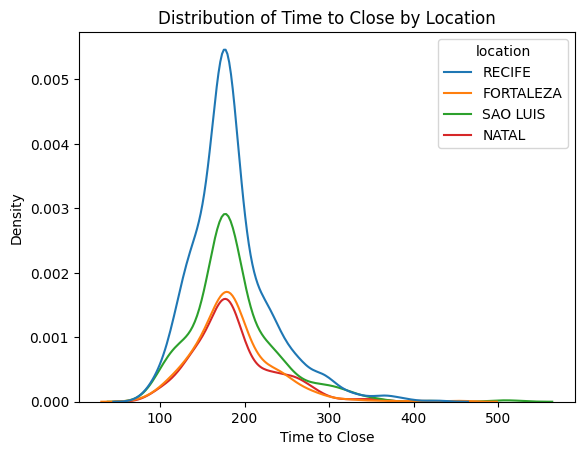

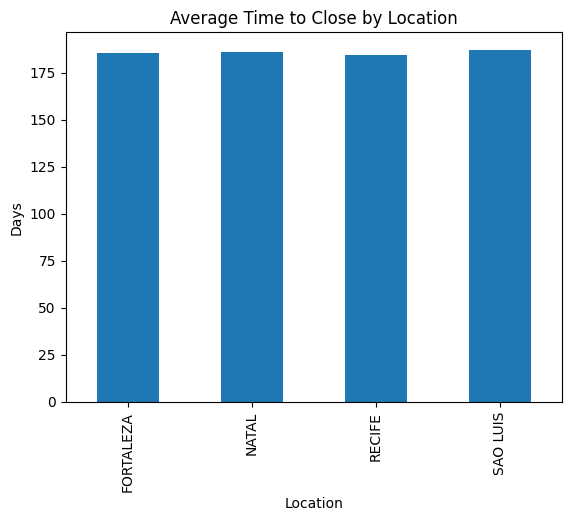

In [39]:
df_close_loc = df[['location','time_to_close']]
close_group = df_close_loc.groupby('location')

sns.kdeplot(data=df_close_loc, x='time_to_close', hue='location')
plt.xlabel('Time to Close')
plt.title('Distribution of Time to Close by Location')
plt.show()

close_mean = df_close_loc.groupby('location')['time_to_close'].mean()
close_mean.plot(kind='bar')

plt.xlabel('Location')
plt.ylabel('Days')
plt.title('Average Time to Close by Location')

plt.show()